# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


## Regression Model Evaluation

Load the boston dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 42, test_size = 0.2)

### Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [47]:
rg = LinearRegression()
rg.fit(X_train, y_train)
y_train_pred = rg.predict(X_train)
y_test_pred = rg.predict(X_test)

### Calculate and print R-squared for both the training and the testing set.

In [48]:
print(f'R-squared for training set: {round(r2_score(y_train, y_train_pred),3)}')
print(f'R-squared for testing set: {round(r2_score(y_test, y_test_pred),3)}')

R-squared for training set: 0.925
R-squared for testing set: 0.947


### Calculate and print mean squared error for both the training and the testing set.

In [49]:
print(f'Mean Squared Error for training set: {round(mean_squared_error(y_train, y_train_pred),3)}')
print(f'Mean Squared Error for testing set: {round(mean_squared_error(y_test, y_test_pred),3)}')

Mean Squared Error for training set: 0.049
Mean Squared Error for testing set: 0.037


### Calculate and print mean absolute error for both the training and the testing set.

In [50]:
print(f'Mean Absolute Error for training set: {round(mean_absolute_error(y_train, y_train_pred),3)}')
print(f'Mean Absolute Error for testing set: {round(mean_absolute_error(y_test, y_test_pred),3)}')

Mean Absolute Error for training set: 0.171
Mean Absolute Error for testing set: 0.146


## Classification Model Evaluation

Load the iris dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

### Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42, test_size =0.2)

### Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Calculate and print the accuracy score for both the training and the testing set.

In [55]:
print(f'Accuracy Score for training set: {round(accuracy_score(y_train, y_train_pred),3)}')
print(f'Accuracy Score for training set: {round(accuracy_score(y_test, y_test_pred),3)}')

Accuracy Score for training set: 0.975
Accuracy Score for training set: 1.0


### Calculate and print the balanced accuracy score for both the training and the testing set.

In [56]:
print(f'Balanced Accuracy Score for training set: {round(balanced_accuracy_score(y_train, y_train_pred),3)}')
print(f'Balanced Accuracy Score for training set: {round(balanced_accuracy_score(y_test, y_test_pred),3)}')

Balanced Accuracy Score for training set: 0.976
Balanced Accuracy Score for training set: 1.0


### Calculate and print the precision score for both the training and the testing set.

In [70]:
print(f"Precision Score for training set: {round(precision_score(y_train, y_train_pred, average = 'weighted'),3)}")
print(f"Precision Score for training set: {round(precision_score(y_test, y_test_pred, average = 'weighted'),3)}")

Precision Score for training set: 0.977
Precision Accuracy Score for training set: 1.0


### Calculate and print the recall score for both the training and the testing set.

In [71]:
print(f"Recall Score for training set: {round(recall_score(y_train, y_train_pred, average = 'weighted'),3)}")
print(f"Recall Score for training set: {round(recall_score(y_test, y_test_pred, average = 'weighted'),3)}")

Recall Score for training set: 0.975
Recall Accuracy Score for training set: 1.0
0.975
1.0


### Calculate and print the F1 score for both the training and the testing set.

In [72]:
print(f"F1 Score for training set: {round(f1_score(y_train, y_train_pred, average = 'weighted'),3)}")
print(f"F1 Score for training set: {round(f1_score(y_test, y_test_pred, average = 'weighted'),3)}")

F1 Score for training set: 0.975
F1 Score for training set: 1.0
0.9749882794186592
1.0


### Generate confusion matrices for both the training and the testing set.

[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]


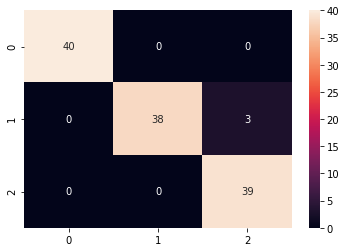

In [36]:
# train
print(confusion_matrix(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


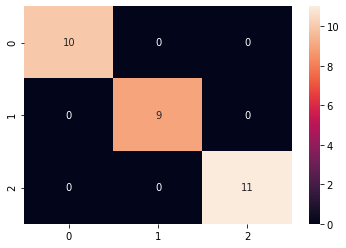

In [37]:
# test
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.